In [1]:
import nevis
nevis.download_os_terrain_50()
nevis.howdy() # Print the current version number


Downloaded, unpacked, and processed file already found: Skipping.

                |>          
 Starting Ben   |   Nevis   
               / \    version
            /\/---\     0.0.5
           /---    \/\      
        /\/   /\   /  \     
     /\/  \  /  \_/    \    
    /      \/           \   


In [106]:
f = nevis.linear_interpolant()
x_max, y_max = nevis.dimensions()

import pints

# Visited points, and means per iteration
points = []
trajectory = []

# Use best found, instead of best guessed
x_best = False


# Create pints error measure
class Error(pints.ErrorMeasure):
    """
    Turn a height into an error to be minimised.

    Writes to global var: not suitable for parallelistion!
    """
    def __init__(self, spline):
        self.f = spline

    def n_parameters(self):
        return 2

    def __call__(self, p):
        points.append(p)
        return -self.f(*p)


# Create callback to store means
def cb(i, opt):
    trajectory.append(opt.x_best() if x_best else opt.x_guessed())

b = pints.RectangularBoundaries([0, 0], [x_max, y_max])

fs = []
for _ in range(100):
    e = Error(f)
    x0 = b.sample()
    s0 = min(b.range()) / 5
    opt = pints.OptimisationController(
        e,
        x0=x0,
        sigma0=s0,
        boundaries=b,
        method=pints.CMAES
    )
    opt.optimiser().set_population_size(400)
    opt.set_callback(cb)
    opt.set_max_unchanged_iterations(100, threshold=0.01)

    opt.set_f_guessed_tracking(not x_best)
    x1, f1 = opt.run()

    # Get final result
    x, y = x1
    nevis.print_result(x, y, -f1)
    fs.append(-f1)
    print(f'Number of function evaluations: {len(points)}.')

Minimising error measure
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 400
Iter. Eval.   Best      Current   Time m:s
0     400     -681.9627 -681.9627   0:00.0
1     800     -681.9627 -630.7061   0:00.0
2     1200    -790.5262 -790.5262   0:00.1
3     1600    -860.8732 -860.8732   0:00.1
20    8400    -1243.683 -1243.683   0:00.7
40    16400   -1308.988 -1308.988   0:01.4
60    24400   -1309.1   -1309.1     0:02.1
80    32400   -1309.1   -1309.1     0:02.7
100   40400   -1309.1   -1309.1     0:03.4
120   48400   -1309.1   -1309.1     0:04.0
140   56400   -1309.1   -1309.1     0:04.4
154   61600   -1309.1   -1309.1     0:04.6
Halting: No significant change for 100 iterations.
Congratulations!
You landed at an altitude of 1309m.
  https://opentopomap.org/#marker=15/57.070204/-3.669488
You are 31m from the nearest named hill top, "Ben Macdui",
  ranked the 2d heighest in GB.
  http://hillsummits.org.uk/htm_summit/518.htm
Numbe

In [109]:
len(fs), len([x for x in fs if x > 1309]),  len([x for x in fs if x > 1310])

(100, 82, 0)

In [104]:
print(x0)

[[374963.3595085  500251.90104036]]


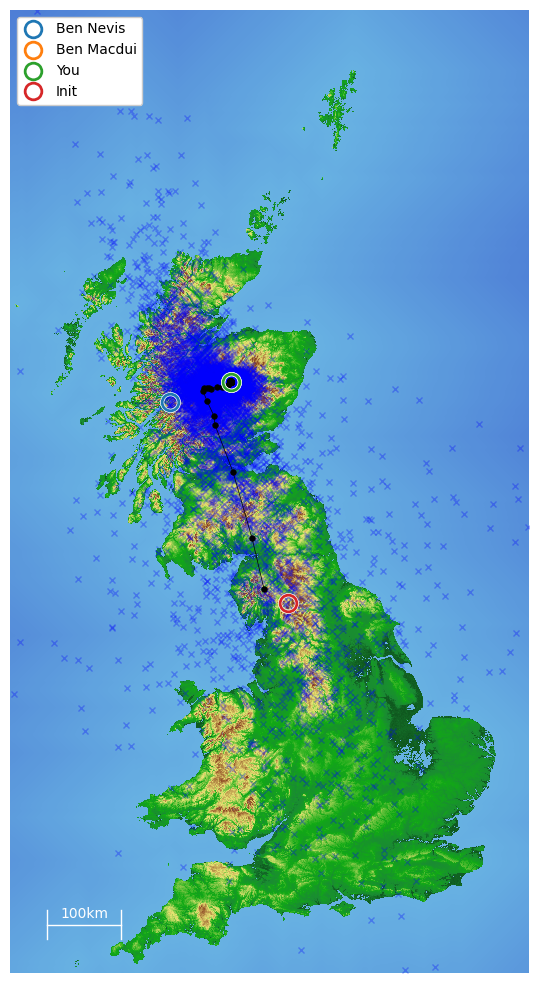

In [105]:


import numpy as np
# Visited points
points = np.array(points)
trajectory = np.array(trajectory)
c = nevis.Coords(gridx=x, gridy=y)
h, d = nevis.Hill.nearest(c)



import matplotlib.pyplot as plt
labels = {
    'Ben Nevis': nevis.ben(),
    h.name: h.coords,
    'You': c,
    'Init': nevis.Coords(gridx=x0[0, 0], gridy=x0[0, 1]),
}
nevis.plot(
    labels=labels,
    trajectory=trajectory,
    points=points,
)
plt.show()



In [14]:
points

array([], dtype=float64)